In [4]:
import pandas as pd
pos=pd.read_excel('score_traina_pos_genre_utilisateur.xlsx')
neg=pd.read_excel('score_traina_neg_genre_utilisateur.xlsx')

In [5]:
index=pos.index.union(neg.index)

In [6]:
score=pos.loc[index].fillna(0).add(neg.loc[index].fillna(0),fill_value=0)

In [25]:
valid=pd.read_csv('valid')# dataset de validation

In [8]:
from os.path import join
path_raw = 'D:/Documents/Machine learning/Projet'
file_train = 'train.csv'
train = pd.read_csv(join(path_raw, file_train), error_bad_lines=False)

In [9]:
app=train[~train.index.isin(valid.loc[:,'Unnamed: 0'])]# dataset d'apprentissage

In [10]:
app.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1
12,TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,my library,NaN,top-hits-for-artist,0
13,3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=,TYhx9eqWklddkLQlApQ5MS9jJCO4H3JHdpISZ3kZSRE=,my library,Local playlist more,local-library,1


In [11]:
file_members = 'members.csv'
file_songs = 'songs.csv'
members = pd.read_csv(join(path_raw, file_members), error_bad_lines=False)
songs = pd.read_csv(join(path_raw, file_songs), error_bad_lines=False)

In [12]:
# correspondance members msno et id
corr_mem=pd.DataFrame(members.msno,members.index)
members.head()
corr_mem.head()

,msno
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=


In [13]:
valid.head(10)

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,1505227,mdIey6HyDWiVIsemFLtNZu0PslNzwLt8WQR+vBIL2ws=,3IAub+F4juhXHglm+kwPI9ZYjXfbd6scnEnhdPriL3I=,my library,Artist more,top-hits-for-artist,1
1,3352014,OVT1afKoXawfczyQ19qccBtN6aXgAvgY2+ptTA+j7A0=,JeXiwEyqL8GNmn6jb99naH97u6dAbauw3Z6x5jlsO94=,radio,Radio,radio,0
2,2145878,1tkkzwEOkbta7Uzt4SXdDSHIG8B1YVAzavHgude0fkU=,+y2UNIAeSzYGfgjlXmh51B+96HlR6NPIXVy/OtA8aS0=,listen with,Others profile more,listen-with,0
3,2878461,T+FJrpYi77CWTUE5nO/vliojRaTPgt2bRUQHy5lhXrQ=,yoBkh/KaiMl+uUFqnmmatpw7ccK0LPCqk3GC0jKpXTU=,my library,Local playlist more,local-library,0
4,3665518,SBk7HZF/f4dHzTk4SIT+xFxFtQSg2To3G/ei8n9z+bU=,WjTdj5NVTtqOPRChE54kPlAt/n/tyNuCvq/NE7iahtQ=,my library,Local playlist more,local-library,0
5,6359250,HmAaZSQ9He3BXNAxkgizK0Z18tHFXPKwLZBVKUitT+c=,h90KlUZE/mlkkPjhbhz3hXY1zvOhqJXuiKBoFWnTDAo=,my library,Local playlist more,local-playlist,1
6,739868,VVhc4pdVs8wrqmVmN6R4OI9igjCT+BorVWmvnNHdAjY=,jQHDoO1960zR7zSDsaycesSmjkvxL46cG1CO6GV1pr8=,my library,Local playlist more,local-playlist,1
7,7153048,OIsM93Abw/FAnNKgV8MeKMpJcLTUqe71Bb9175wxWz8=,UoLnEGgVEj2w0TouRQ9b15c3GWM4Ti5vGYeyuLj1nQk=,listen with,Others profile more,listen-with,0
8,3003420,Ognp+L0Jrz7DjpPRwSPhYKoE9RCuFuBjYjximnzVITg=,ihKc4lpcMihjQhOtqK7OcQx9AoZdZr1AbHA62dysy0M=,listen with,Others profile more,listen-with,0
9,1929088,Wna4EUGjNfnaFmHY4hjmQRMOlni27SX1kmQ7FeR0b28=,9W/H8tPBKQ7VWmBctuQ6RabciYdr1l+/kg1YPDcPOlU=,discover,Online playlist more,online-playlist,0


In [97]:
def attribute_target(user,song,norm):# en entrée on donne un msno d'utilisateur et une chanson (song_id)
    # et en sortie on a la target prédite(en utilisant l'utilisateur le plus proche)
    near_user=0
    dist=3000
    users=app[app['song_id']==song]['msno']# recup tous les utilisateurs de app qui ont écouté la même chanson
    ind1=corr_mem.loc[corr_mem['msno']==user].index# index de l'utilisateur qui ns intéresse
    inds=corr_mem.loc[corr_mem['msno'].isin(users)].index# index des utilisateurs de users
    for user in inds:# on cherche l'utilisateur le plus proche de notre utilisateur dans la liste users
        dist=min(dist,np.linalg.norm(score.loc[ind1]-score.loc[user],norm))
        if dist==np.linalg.norm(score.loc[ind1]-score.loc[user],norm):
            near_user=user       
    return app.loc[(app['msno']==corr_mem.loc[near_user]['msno'])&(app['song_id']==song)]['target']# on récupère la target pour cet utilisateur

In [307]:
for i in range(200):# pour les 200 premières ligne de valid, on calcule les targets
    try:
        valid.loc[i,'pred']=attribute_target(valid.msno[i],valid.song_id[i],2).values[0]
    except:
        continue

In [317]:
np.sum(valid.loc[0:200]['target']==valid.loc[0:200]['pred'])/200

0.57499999999999996

On obtient moins de 60% de "bonne classification" avec la norme euclidienne, décevant ! 

In [110]:
for i in range(50):# pour les 50 premières ligne de valid, on calcule les targets
    try:
        valid.loc[i,'pred']=attribute_target(valid.msno[i],valid.song_id[i],float('inf')).values[0]
    except:
        continue

In [112]:
np.sum(valid.loc[0:50]['target']==valid.loc[0:50]['pred'])/50

0.64000000000000001

Avec la norme infini, on obtient pour les 50 premières lignes de valid 64% de bonne classification, c'est mieux mais ça reste faible.

In [117]:
for i in range(20,50):
    try:
        valid.loc[i,'pred']=attribute_target(valid.msno[i],valid.song_id[i],1)#.values[0]
    except:
        continue

In [118]:
np.sum(valid.loc[0:50]['target']==valid.loc[0:50]['pred'])/50

0.64000000000000001

In [121]:
import numpy as np
from sklearn.decomposition import PCA
X = score
pca = PCA(n_components=4)
pca.fit(X)


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[ 0.8472549   0.05135258  0.02048673  0.01650446]
[ 9983.46244297  2457.8494806   1552.42458137  1393.39692155]


In [370]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
model=KMeans(3)
y_pred=model.fit_predict(score)
y_pred=pd.Series(y_pred,score.index)

In [500]:
def attribute_target2(user,song):
    near_user=0
    dist=3000
    ind1=corr_mem.loc[corr_mem['msno']==user].index# index de l'utilisateur qui ns intéresse
    users=app[app['song_id']==song]['msno']# recup tous les utilisateurs de app qui ont écouté la même chanson
    inds=corr_mem.loc[corr_mem['msno'].isin(users)].index
    ind=[ind for ind in inds if y_pred[ind]==y_pred[ind1].values[0]]# on garde les utilisateurs qui sont dans le meme cluster que ind1
    liste=[]
    for ind in inds[:5] :
        liste.append(app.loc[(app['msno']==corr_mem.loc[ind]['msno'])&(app['song_id']==song)]['target'].values[0])# on récupère les targets de tous ces utilisateurs
    return round(np.sum(liste)/len(liste))# On prend la target qui apparaît le plus de fois

In [503]:
for i in range(10):
    try:
        valid.loc[i,'pred']=attribute_target2(valid.msno[i],valid.song_id[i])
    except:
        continue

C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [505]:
valid.head(10)

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,pred
0,1505227,mdIey6HyDWiVIsemFLtNZu0PslNzwLt8WQR+vBIL2ws=,3IAub+F4juhXHglm+kwPI9ZYjXfbd6scnEnhdPriL3I=,my library,Artist more,top-hits-for-artist,1,1.0
1,3352014,OVT1afKoXawfczyQ19qccBtN6aXgAvgY2+ptTA+j7A0=,JeXiwEyqL8GNmn6jb99naH97u6dAbauw3Z6x5jlsO94=,radio,Radio,radio,0,0.0
2,2145878,1tkkzwEOkbta7Uzt4SXdDSHIG8B1YVAzavHgude0fkU=,+y2UNIAeSzYGfgjlXmh51B+96HlR6NPIXVy/OtA8aS0=,listen with,Others profile more,listen-with,0,1.0
3,2878461,T+FJrpYi77CWTUE5nO/vliojRaTPgt2bRUQHy5lhXrQ=,yoBkh/KaiMl+uUFqnmmatpw7ccK0LPCqk3GC0jKpXTU=,my library,Local playlist more,local-library,0,0.0
4,3665518,SBk7HZF/f4dHzTk4SIT+xFxFtQSg2To3G/ei8n9z+bU=,WjTdj5NVTtqOPRChE54kPlAt/n/tyNuCvq/NE7iahtQ=,my library,Local playlist more,local-library,0,1.0
5,6359250,HmAaZSQ9He3BXNAxkgizK0Z18tHFXPKwLZBVKUitT+c=,h90KlUZE/mlkkPjhbhz3hXY1zvOhqJXuiKBoFWnTDAo=,my library,Local playlist more,local-playlist,1,0.0
6,739868,VVhc4pdVs8wrqmVmN6R4OI9igjCT+BorVWmvnNHdAjY=,jQHDoO1960zR7zSDsaycesSmjkvxL46cG1CO6GV1pr8=,my library,Local playlist more,local-playlist,1,NaN
7,7153048,OIsM93Abw/FAnNKgV8MeKMpJcLTUqe71Bb9175wxWz8=,UoLnEGgVEj2w0TouRQ9b15c3GWM4Ti5vGYeyuLj1nQk=,listen with,Others profile more,listen-with,0,0.0
8,3003420,Ognp+L0Jrz7DjpPRwSPhYKoE9RCuFuBjYjximnzVITg=,ihKc4lpcMihjQhOtqK7OcQx9AoZdZr1AbHA62dysy0M=,listen with,Others profile more,listen-with,0,1.0
9,1929088,Wna4EUGjNfnaFmHY4hjmQRMOlni27SX1kmQ7FeR0b28=,9W/H8tPBKQ7VWmBctuQ6RabciYdr1l+/kg1YPDcPOlU=,discover,Online playlist more,online-playlist,0,1.0


In [502]:
attribute_target2(valid.msno[0],valid.song_id[0])

1.0

In [379]:
users=app[app['song_id']=='3IAub+F4juhXHglm+kwPI9ZYjXfbd6scnEnhdPriL3I=']['msno']


In [402]:
# On récupère le premier utilisateur de valid 
y_pred=pd.Series(y_pred,score.index)
import numpy as np
ind1=corr_mem.loc[corr_mem['msno']=='mdIey6HyDWiVIsemFLtNZu0PslNzwLt8WQR+vBIL2ws='].index
inds=corr_mem.loc[corr_mem['msno'].isin(users)].index

In [425]:
inds=[ind for ind in inds if y_pred[ind]==y_pred[ind1].values[0]]
inds

[5138, 7703, 10477, 20553, 23616, 30529, 32046]

In [442]:
liste=[]
for ind in inds:
    liste.append(app.loc[(app['msno'] ==corr_mem.loc[ind]['msno'])&(app['song_id']=='3IAub+F4juhXHglm+kwPI9ZYjXfbd6scnEnhdPriL3I=')]['target'].values[0])

In [452]:
round(np.sum(liste)/len(liste))

1

In [227]:
dist=3000
for user in inds:
    dist=min(dist,np.linalg.norm(score.loc[ind1]-score.loc[user]))
    if dist==np.linalg.norm(score.loc[ind1]-score.loc[user]):
        near_user=user
app.loc[(app['msno']==corr_mem.loc[near_user]['msno'])&(app['song_id']=='3IAub+F4juhXHglm+kwPI9ZYjXfbd6scnEnhdPriL3I=')]['target'] 

2216260    1
Name: target, dtype: int64

In [376]:
np.sum(y_pred==0)/len(y_pred)

0.091378573073254171

In [378]:
y_pred[ind1][0]

0

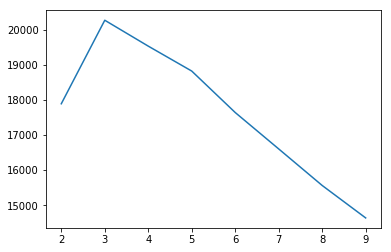

In [344]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

perf=[]
my_k=range(2,10)
for k in my_k:
    model=KMeans(k)
    y_pred=model.fit_predict(score)
    perf.append(metrics.calinski_harabaz_score(score,y_pred))

plt.plot(my_k,perf)
plt.show()

In [337]:
score.shape

(30401, 164)